![](https://ak.picdn.net/shutterstock/videos/10501562/thumb/9.jpg)

# We are doing this excerise to learn cleaning data and visualize it, airline dataset shows us which best flight take max and minimum waiting minutes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
data1 = pd.read_csv('../input/data101/airlines_final.csv')
data1.head(100)

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,108,746,Sunday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,120.0,Clean,Very safe,Very satisfied
96,109,2739,Friday,UNITED,KAHULUI,West US,Small,Gates 60-69,2018-12-31,32.0,Somewhat clean,Very safe,Somewhat satsified
97,110,1984,Friday,AIR FRANCE/KLM,AMSTERDAM,eur,Hub,Gates 1-12,2018-12-31,115.0,Average,Neutral,Somewhat unsatisfied
98,111,2566,Saturday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,103.0,Clean,Very safe,Somewhat satsified


In [3]:
# shape and data types of the data
print(data1.shape)
print(data1.dtypes)

(2477, 13)
Unnamed: 0         int64
id                 int64
day               object
airline           object
destination       object
dest_region       object
dest_size         object
boarding_area     object
dept_time         object
wait_min         float64
cleanliness       object
safety            object
satisfaction      object
dtype: object


In [4]:
# select numeric columns
data1_numeric = data1.select_dtypes(include=[np.number])
numeric_cols = data1_numeric.columns.values
print(numeric_cols)

['Unnamed: 0' 'id' 'wait_min']


In [5]:
# select non numeric columns
data1_non_num = data1.select_dtypes(exclude=[np.number])
non_num_cols = data1_non_num.columns.values
print(non_num_cols)

['day' 'airline' 'destination' 'dest_region' 'dest_size' 'boarding_area'
 'dept_time' 'cleanliness' 'safety' 'satisfaction']


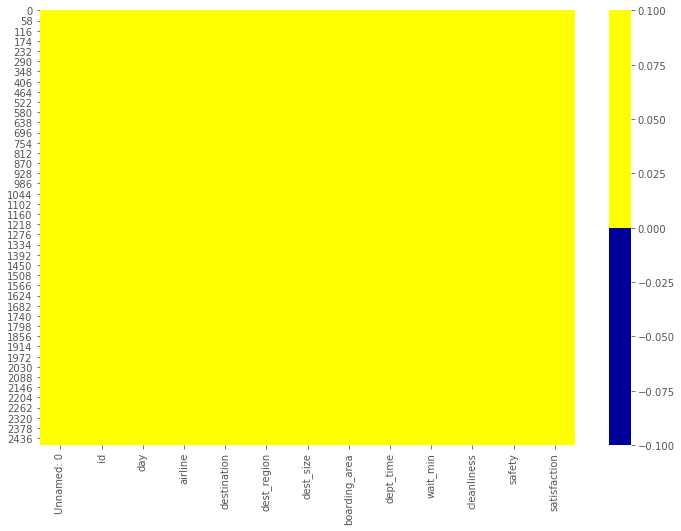

In [6]:
cols = data1.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data1[cols].isnull(), cmap=sns.color_palette(colours))

In [7]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in data1.columns:
    pct_missing = np.mean(data1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0.0%
id - 0.0%
day - 0.0%
airline - 0.0%
destination - 0.0%
dest_region - 0.0%
dest_size - 0.0%
boarding_area - 0.0%
dept_time - 0.0%
wait_min - 0.0%
cleanliness - 0.0%
safety - 0.0%
satisfaction - 0.0%


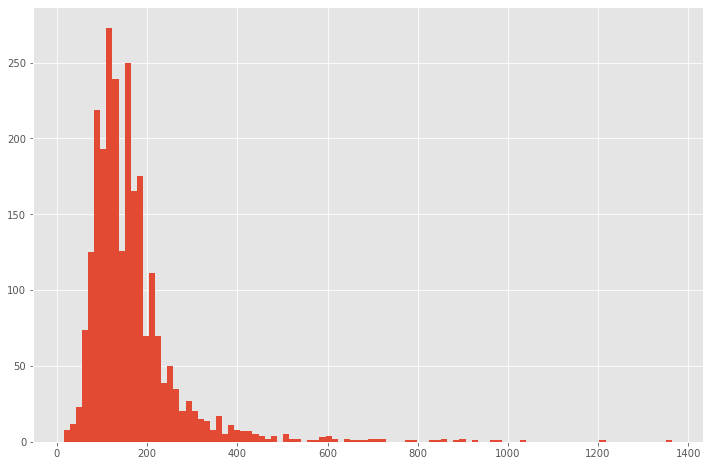

In [8]:
#To detect outliers, use histogram on numeric feature
data1['wait_min'].hist(bins=100)

In [9]:
data1['wait_min'].describe()

count    2477.000000
mean      166.084376
std       107.643625
min        15.000000
25%       105.000000
50%       145.000000
75%       185.000000
max      1365.000000
Name: wait_min, dtype: float64

In [10]:
#To find the rows with same value, 
#we can create a list of features with a high percentage of the same value.

num_rows = len(data1.index)
low_information_cols = [] #

for col in data1.columns:
    cnts = data1[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.50:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

dept_time: 98.50626%
2018-12-31    2440
2018-01-01      37
Name: dept_time, dtype: int64

safety: 52.32136%
Very safe          1296
Somewhat safe       864
Neutral             303
Very unsafe           8
Somewhat unsafe       6
Name: safety, dtype: int64

satisfaction: 54.46104%
Somewhat satsified      1349
Very satisfied           596
Neutral                  486
Somewhat unsatisfied      42
Very unsatisfied           4
Name: satisfaction, dtype: int64



In [11]:
#To check num of airlines

dfg = data1['airline'].value_counts(dropna=False)
dfg.describe()

count     33.000000
mean      75.060606
std      109.152113
min        2.000000
25%       13.000000
50%       28.000000
75%      120.000000
max      526.000000
Name: airline, dtype: float64

# # Now that we clean our data, lets find out which flight has best cleaniess, safety and user's satisfaction.
# *Data Manipulation*


In [12]:
#First find out which weekday has most flights
Day = data1['day'].value_counts()
Day

Tuesday      535
Wednesday    518
Thursday     488
Friday       368
Sunday       267
Saturday     210
Monday        91
Name: day, dtype: int64

In [13]:
#Tuesday got the most flights, now we check which flight has best cleanliness...
clean = data1[(data1['cleanliness'] == 'Clean' )  & (data1['satisfaction'] == 'Very satisfied') & (data1['safety'] == 'Very safe')]
clean

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
16,17,954,Tuesday,ALASKA,NEW YORK-JFK,EAST US,Hub,Gates 50-59,2018-12-31,100.0,Clean,Very safe,Very satisfied
18,19,803,Sunday,ALASKA,BALTIMORE,East US,Medium,Gates 50-59,2018-12-31,155.0,Clean,Very safe,Very satisfied
24,25,3097,Tuesday,UNITED,SPOKANE,West US,Small,Gates 70-90,2018-12-31,604.0,Clean,Very safe,Very satisfied
41,44,2288,Tuesday,UNITED,SAN ANTONIO,Midwest US,Medium,Gates 70-90,2018-12-31,150.0,Clean,Very safe,Very satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2793,2570,Tuesday,UNITED,CHICAGO-O'HARE,Midwest US,Hub,Gates 60-69,2018-12-31,120.0,Clean,Very safe,Very satisfied
2462,2794,3007,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,208.0,Clean,Very safe,Very satisfied
2470,2802,394,Friday,ALASKA,LOS ANGELES,West US,Hub,Gates 50-59,2018-12-31,115.0,Clean,Very safe,Very satisfied
2473,2805,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied


In [14]:
dfg = clean['airline'].value_counts(dropna=False)
dfg.describe()

count    30.000000
mean     12.366667
std      19.236251
min       1.000000
25%       2.000000
50%       4.000000
75%      14.500000
max      86.000000
Name: airline, dtype: float64

In [15]:
#Out of 33 arilines (2477 flights), we have 30 airlines (371 flights) which is 1. clean, 2. very safe and 3. very satisfactory for users
#Now lets sort our data with respect to dest_size

In [16]:
clean_more = clean[(clean['dest_size'] == 'Hub' )]
clean_more

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
61,68,2257,Wednesday,UNITED,LOS ANGELES,West US,Hub,Gates 60-69,2018-12-31,65.0,Clean,Very safe,Very satisfied
81,89,1747,Monday,LUFTHANSA,MUNICH,Europe,Hub,Gates 91-102,2018-12-31,205.0,Clean,Very safe,Very satisfied
82,90,1954,Saturday,AIR FRANCE/KLM,PARIS-DE GAULLE,Europe,Hub,Gates 1-12,2018-12-31,245.0,Clean,Very safe,Very satisfied
85,94,2334,Tuesday,DELTA,MINNEAPOLIS-ST. PAUL,Midwest US,Hub,Gates 40-48,2018-12-31,155.0,Clean,Very safe,Very satisfied
90,101,1593,Thursday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,50.0,Clean,Very safe,Very satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2793,2570,Tuesday,UNITED,CHICAGO-O'HARE,Midwest US,Hub,Gates 60-69,2018-12-31,120.0,Clean,Very safe,Very satisfied
2462,2794,3007,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,208.0,Clean,Very safe,Very satisfied
2470,2802,394,Friday,ALASKA,LOS ANGELES,West US,Hub,Gates 50-59,2018-12-31,115.0,Clean,Very safe,Very satisfied
2473,2805,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied


In [17]:
clean_more.dest_region.value_counts()

West US                  55
East US                  33
Asia                     30
Midwest US               23
Europe                   19
Middle East              10
Canada/Mexico             5
Australia/New Zealand     3
Name: dest_region, dtype: int64

# Now that we have more clean data, we have total 20 airlines (178 flights). Most flights have 'west US' region, now lets find out which flight have minimum 'wait_min' to maximum 'wait_min' according to destinations in this region.

#   *Data Visualization*

In [18]:
import seaborn as sns

In [19]:
#Frist 'west US'
final_clean_west = clean_more[(clean_more['dest_region'] == 'West US')]
final_clean_west

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
61,68,2257,Wednesday,UNITED,LOS ANGELES,West US,Hub,Gates 60-69,2018-12-31,65.0,Clean,Very safe,Very satisfied
90,101,1593,Thursday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,50.0,Clean,Very safe,Very satisfied
112,127,884,Tuesday,ALASKA,SEATTLE,West US,Hub,Gates 50-59,2018-12-31,85.0,Clean,Very safe,Very satisfied
147,167,3223,Thursday,AMERICAN,LOS ANGELES,West US,Hub,Gates 50-59,2018-12-31,60.0,Clean,Very safe,Very satisfied
152,172,2157,Wednesday,FRONTIER,DENVER,West US,Hub,Gates 20-39,2018-12-31,153.0,Clean,Very safe,Very satisfied
270,309,3249,Wednesday,AMERICAN,PHOENIX,West US,Hub,Gates 50-59,2018-12-31,185.0,Clean,Very safe,Very satisfied
401,459,1211,Tuesday,SOUTHWEST,LAS VEGAS,West US,Hub,Gates 20-39,2018-12-31,75.0,Clean,Very safe,Very satisfied
475,542,1227,Tuesday,SOUTHWEST,LAS VEGAS,West US,Hub,Gates 20-39,2018-12-31,105.0,Clean,Very safe,Very satisfied
502,575,1232,Tuesday,SOUTHWEST,LAS VEGAS,West US,Hub,Gates 20-39,2018-12-31,105.0,Clean,Very safe,Very satisfied
506,581,1449,Wednesday,UNITED,LAS VEGAS,West US,Hub,Gates 60-69,2018-12-31,202.0,Clean,Very safe,Very satisfied


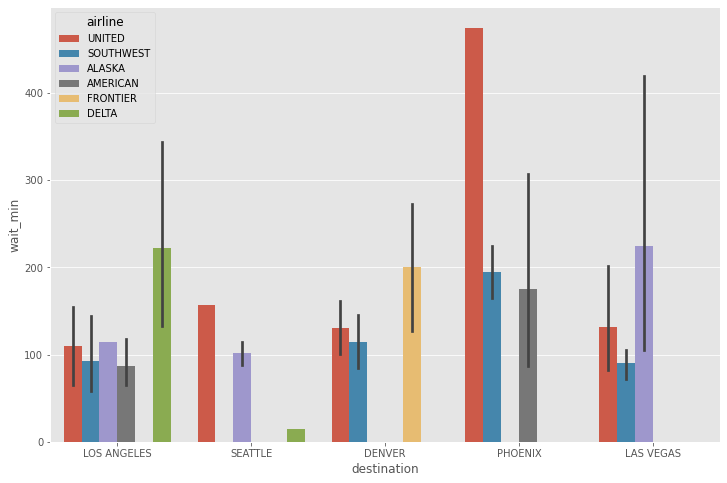

In [20]:
sns.barplot(x="destination",
               y="wait_min",
               hue="airline",
               data=final_clean_west) 

# So we have minimum 'wait_min' airline 'DELTA' and maxmium 'wait_min' airline 'UNITED', with destination of SEATTLE and PHOENIX respectively. 

# Now second region with most flights is 'East US'

In [21]:
final_clean_east = clean_more[(clean_more['dest_region'] == 'East US')]
final_clean_east

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
95,108,746,Sunday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,120.0,Clean,Very safe,Very satisfied
113,128,2054,Friday,UNITED,NEWARK,East US,Hub,Gates 70-90,2018-12-31,150.0,Clean,Very safe,Very satisfied
397,455,2056,Friday,UNITED,NEWARK,East US,Hub,Gates 70-90,2018-12-31,180.0,Clean,Very safe,Very satisfied
422,481,1474,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,160.0,Clean,Very safe,Very satisfied
457,521,2760,Thursday,DELTA,ATLANTA,East US,Hub,Gates 40-48,2018-12-31,210.0,Clean,Very safe,Very satisfied
526,604,2008,Wednesday,UNITED,NEWARK,East US,Hub,Gates 70-90,2018-12-31,90.0,Clean,Very safe,Very satisfied
774,881,3001,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,268.0,Clean,Very safe,Very satisfied
920,1045,2784,Thursday,DELTA,ATLANTA,East US,Hub,Gates 40-48,2018-12-31,150.0,Clean,Very safe,Very satisfied
944,1071,3131,Sunday,ALASKA,NEWARK,East US,Hub,Gates 50-59,2018-12-31,85.0,Clean,Very safe,Very satisfied
1167,1332,679,Thursday,UNITED,NEWARK,East US,Hub,Gates 70-90,2018-12-31,165.0,Clean,Very safe,Very satisfied


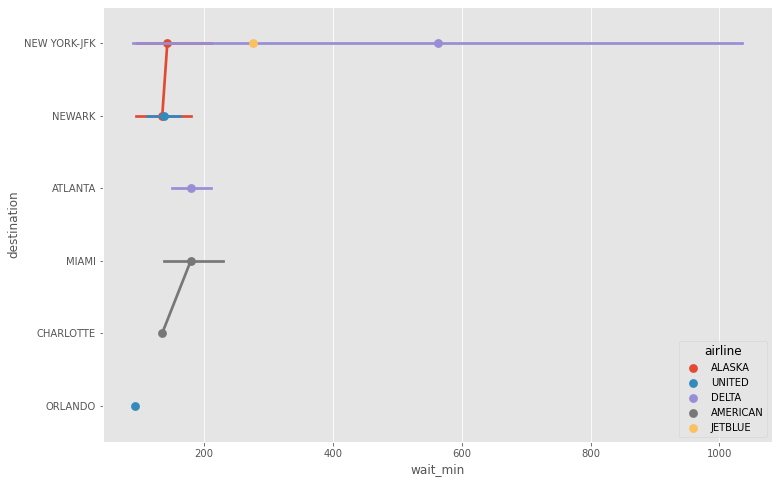

In [22]:
sns.pointplot(x='wait_min',
             y='destination',
             hue='airline',
             data=final_clean_east)

# In 'east US' region, UNITED flight has minimum 'wait_min and DELTA has maximum, now wind up all six remaining regions.

In [23]:
final_clean_3 = clean_more[(clean_more['dest_region'] == 'Asia')]
final_clean_3

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
91,103,716,Wednesday,CATHAY PACIFIC,HONG KONG,Asia,Hub,Gates 1-12,2018-12-31,270.0,Clean,Very safe,Very satisfied
211,238,2878,Friday,EVA AIR,TAIPEI,Asia,Hub,Gates 91-102,2018-12-31,180.0,Clean,Very safe,Very satisfied
278,318,2881,Friday,EVA AIR,TAIPEI,Asia,Hub,Gates 91-102,2018-12-31,130.0,Clean,Very safe,Very satisfied
318,363,1553,Wednesday,AIR CHINA,BEIJING,Asia,Hub,Gates 91-102,2018-12-31,185.0,Clean,Very safe,Very satisfied
449,510,1685,Saturday,CATHAY PACIFIC,HONG KONG,Asia,Hub,Gates 1-12,2018-12-31,185.0,Clean,Very safe,Very satisfied
498,571,1249,Thursday,UNITED INTL,TOKYO-NARITA,Asia,Hub,Gates 91-102,2018-12-31,120.0,Clean,Very safe,Very satisfied
559,643,2151,Thursday,CATHAY PACIFIC,HONG KONG,Asia,Hub,Gates 1-12,2018-12-31,155.0,Clean,Very safe,Very satisfied
655,749,1385,Tuesday,UNITED INTL,SHANGHAI,Asia,Hub,Gates 91-102,2018-12-31,235.0,Clean,Very safe,Very satisfied
761,867,1687,Saturday,CATHAY PACIFIC,HONG KONG,Asia,Hub,Gates 1-12,2018-12-31,155.0,Clean,Very safe,Very satisfied
846,963,712,Wednesday,CATHAY PACIFIC,HONG KONG,Asia,Hub,Gates 1-12,2018-12-31,165.0,Clean,Very safe,Very satisfied


In [24]:
final_clean_4 = clean_more[(clean_more['dest_region'] == 'Midwest US')]
final_clean_4

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
85,94,2334,Tuesday,DELTA,MINNEAPOLIS-ST. PAUL,Midwest US,Hub,Gates 40-48,2018-12-31,155.0,Clean,Very safe,Very satisfied
103,116,2627,Tuesday,UNITED,CHICAGO-O'HARE,Midwest US,Hub,Gates 60-69,2018-12-31,75.0,Clean,Very safe,Very satisfied
158,178,1113,Thursday,DELTA,MINNEAPOLIS-ST. PAUL,Midwest US,Hub,Gates 40-48,2018-12-31,120.0,Clean,Very safe,Very satisfied
215,242,1771,Thursday,AMERICAN,CHICAGO-O'HARE,Midwest US,Hub,Gates 50-59,2018-12-31,115.0,Clean,Very safe,Very satisfied
399,457,1767,Thursday,AMERICAN,CHICAGO-O'HARE,Midwest US,Hub,Gates 50-59,2018-12-31,80.0,Clean,Very safe,Very satisfied
832,949,2701,Friday,UNITED,CHICAGO-O'HARE,Midwest US,Hub,Gates 60-69,2018-12-31,150.0,Clean,Very safe,Very satisfied
867,986,2618,Tuesday,UNITED,CHICAGO-O'HARE,Midwest US,Hub,Gates 60-69,2018-12-31,90.0,Clean,Very safe,Very satisfied
971,1103,3173,Thursday,AMERICAN,DALLAS-FT. WORTH,Midwest US,Hub,Gates 50-59,2018-12-31,120.0,Clean,Very safe,Very satisfied
993,1130,460,Sunday,UNITED,DALLAS-FT. WORTH,Midwest US,Hub,Gates 60-69,2018-12-31,80.0,Clean,Very safe,Very satisfied
1108,1266,868,Tuesday,AMERICAN,DALLAS-FT. WORTH,Midwest US,Hub,Gates 50-59,2018-12-31,115.0,Clean,Very safe,Very satisfied


In [25]:
final_clean_5 = clean_more[(clean_more['dest_region'] == 'Europe')]
final_clean_5

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
81,89,1747,Monday,LUFTHANSA,MUNICH,Europe,Hub,Gates 91-102,2018-12-31,205.0,Clean,Very safe,Very satisfied
82,90,1954,Saturday,AIR FRANCE/KLM,PARIS-DE GAULLE,Europe,Hub,Gates 1-12,2018-12-31,245.0,Clean,Very safe,Very satisfied
338,386,1323,Tuesday,UNITED INTL,LONDON HEATHROW,Europe,Hub,Gates 91-102,2018-12-31,200.0,Clean,Very safe,Very satisfied
541,622,1286,Tuesday,UNITED INTL,LONDON HEATHROW,Europe,Hub,Gates 91-102,2018-12-31,120.0,Clean,Very safe,Very satisfied
825,941,1375,Tuesday,UNITED INTL,PARIS-DE GAULLE,Europe,Hub,Gates 91-102,2018-12-31,105.0,Clean,Very safe,Very satisfied
995,1132,1828,Monday,UNITED INTL,LONDON HEATHROW,Europe,Hub,Gates 91-102,2018-12-31,455.0,Clean,Very safe,Very satisfied
1103,1261,1324,Tuesday,UNITED INTL,LONDON HEATHROW,Europe,Hub,Gates 91-102,2018-12-31,200.0,Clean,Very safe,Very satisfied
1115,1275,364,Friday,LUFTHANSA,FRANKFURT,Europe,Hub,Gates 91-102,2018-12-31,135.0,Clean,Very safe,Very satisfied
1163,1328,2718,Wednesday,AIR FRANCE/KLM,PARIS-DE GAULLE,Europe,Hub,Gates 1-12,2018-12-31,360.0,Clean,Very safe,Very satisfied
1338,1528,1703,Sunday,AIR FRANCE/KLM,PARIS-DE GAULLE,Europe,Hub,Gates 1-12,2018-12-31,150.0,Clean,Very safe,Very satisfied


In [26]:
final_clean_6 = clean_more[(clean_more['dest_region'] == 'Middle East')]
final_clean_6

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
255,292,2921,Friday,TURKISH AIRLINES,ISTANBUL,Middle East,Hub,Gates 91-102,2018-12-31,235.0,Clean,Very safe,Very satisfied
373,427,539,Thursday,EMIRATES,DUBAI,Middle East,Hub,Gates 1-12,2018-12-31,30.0,Clean,Very safe,Very satisfied
375,430,2916,Friday,TURKISH AIRLINES,ISTANBUL,Middle East,Hub,Gates 91-102,2018-12-31,105.0,Clean,Very safe,Very satisfied
474,541,2906,Friday,TURKISH AIRLINES,ISTANBUL,Middle East,Hub,Gates 91-102,2018-12-31,315.0,Clean,Very safe,Very satisfied
483,553,1654,Saturday,EMIRATES,DUBAI,Middle East,Hub,Gates 1-12,2018-12-31,225.0,Clean,Very safe,Very satisfied
1109,1267,560,Thursday,EMIRATES,DUBAI,Middle East,Hub,Gates 1-12,2018-12-31,240.0,Clean,Very safe,Very satisfied
1137,1299,1664,Saturday,EMIRATES,DUBAI,Middle East,Hub,Gates 1-12,2018-12-31,135.0,Clean,Very safe,Very satisfied
1566,1786,1665,Saturday,EMIRATES,DUBAI,Middle East,Hub,Gates 1-12,2018-12-31,132.0,Clean,Very safe,Very satisfied
1589,1813,542,Thursday,EMIRATES,DUBAI,Middle East,Hub,Gates 1-12,2018-12-31,135.0,Clean,Very safe,Very satisfied
1667,1899,1662,Saturday,EMIRATES,DUBAI,Middle East,Hub,Gates 1-12,2018-12-31,180.0,Clean,Very safe,Very satisfied


In [27]:
final_clean_7 = clean_more[(clean_more['dest_region'] == 'Canada/Mexico')]
final_clean_7

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
140,160,1724,Monday,AIR CANADA,TORONTO,Canada/Mexico,Hub,Gates 91-102,2018-12-31,150.0,Clean,Very safe,Very satisfied
777,885,759,Thursday,AIR CANADA,TORONTO,Canada/Mexico,Hub,Gates 91-102,2018-12-31,1210.0,Clean,Very safe,Very satisfied
1439,1643,755,Thursday,AIR CANADA,TORONTO,Canada/Mexico,Hub,Gates 91-102,2018-12-31,145.0,Clean,Very safe,Very satisfied
1757,2003,2125,Monday,UNITED INTL,MEXICO CITY,Canada/Mexico,Hub,Gates 91-102,2018-12-31,370.0,Clean,Very safe,Very satisfied
2213,2526,255,Friday,AIR CANADA,TORONTO,Canada/Mexico,Hub,Gates 91-102,2018-12-31,235.0,Clean,Very safe,Very satisfied


In [28]:
final_clean_8 = clean_more[(clean_more['dest_region'] == 'Australia/New Zealand')]
final_clean_8

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
1278,1459,2293,Wednesday,QANTAS,SYDNEY,Australia/New Zealand,Hub,Gates 1-12,2018-12-31,225.0,Clean,Very safe,Very satisfied
1815,2071,2398,Wednesday,UNITED INTL,SYDNEY,Australia/New Zealand,Hub,Gates 91-102,2018-12-31,425.0,Clean,Very safe,Very satisfied
2106,2404,2188,Wednesday,QANTAS,SYDNEY,Australia/New Zealand,Hub,Gates 1-12,2018-12-31,150.0,Clean,Very safe,Very satisfied


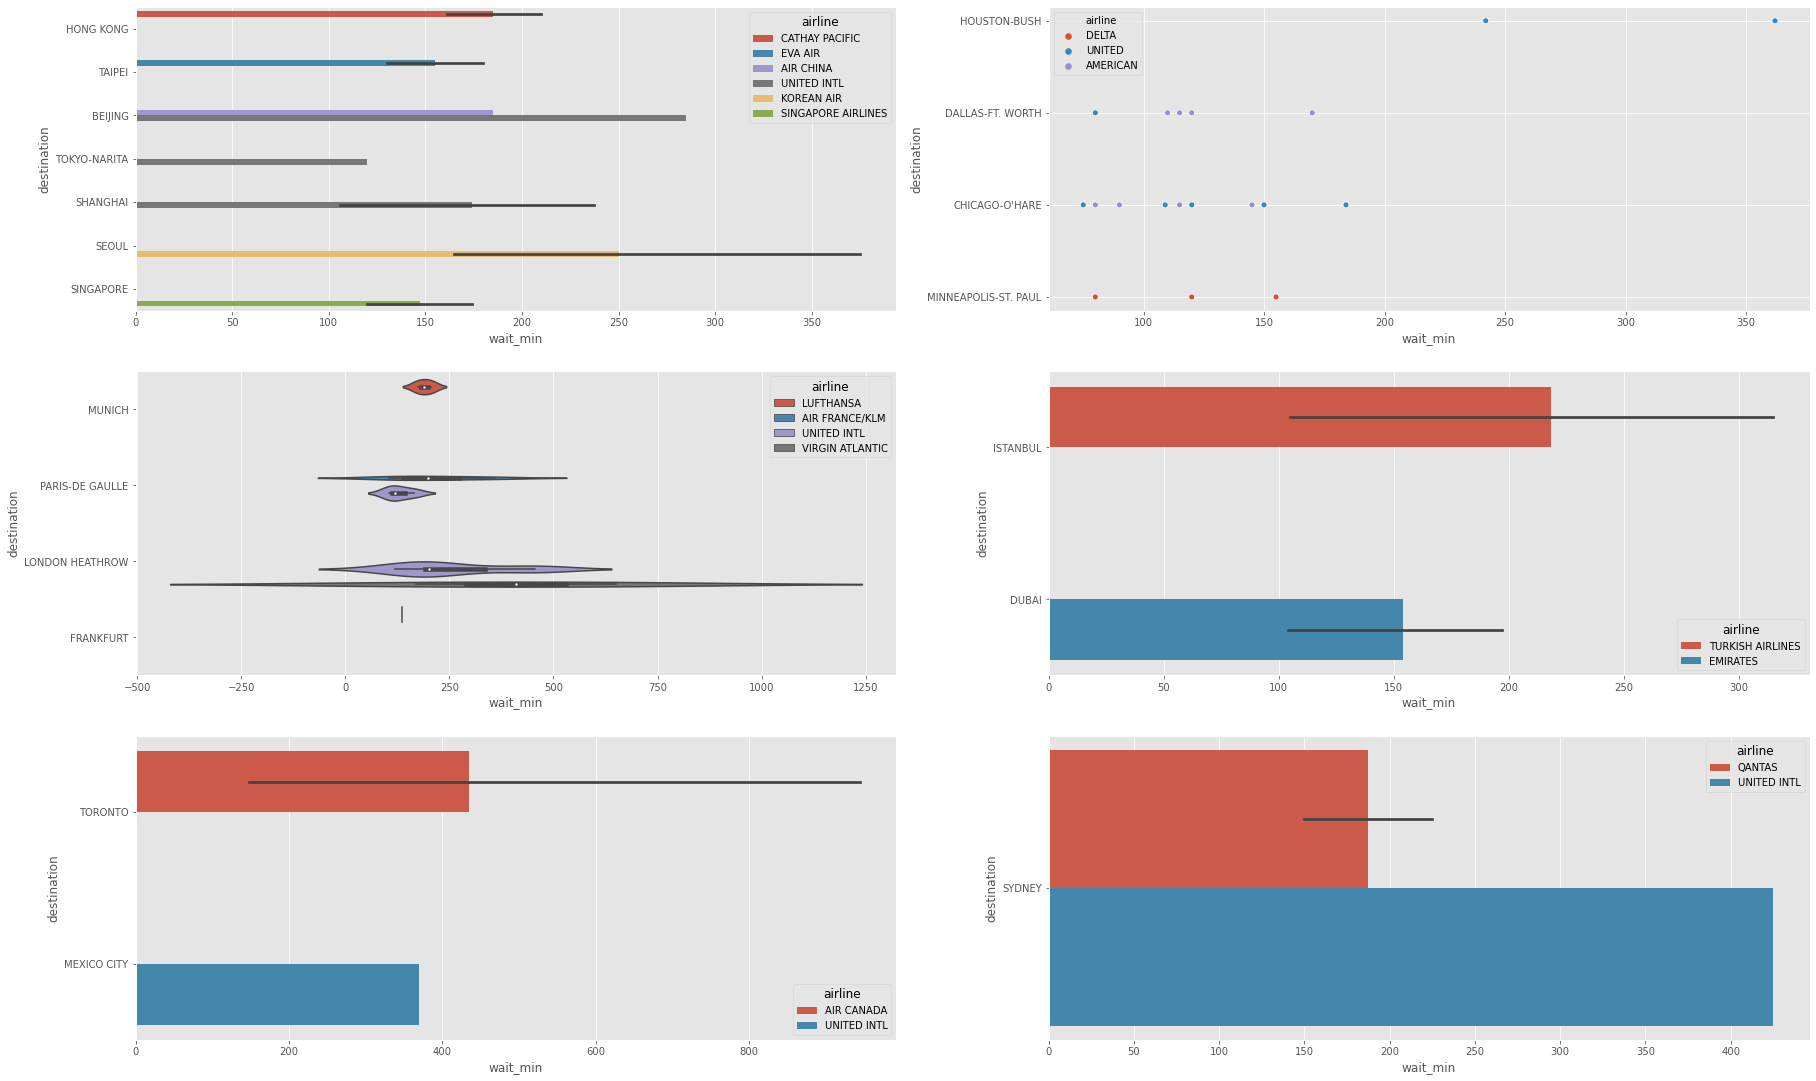

In [29]:
# Create figure:
fig = plt.figure(figsize=(30,19))
# Display the result - Plot 1:
plt.subplot(321)
# Plot temperatures:
sns.barplot(x='wait_min',
             y='destination',
             hue='airline',
             data=final_clean_3)
            
plt.subplot(322)
# Plot flights:
sns.scatterplot(x='wait_min',
             y='destination',
             hue='airline',
             data=final_clean_4)
            
plt.subplot(323)
sns.violinplot(x='wait_min',
             y='destination',
             hue='airline',
             data=final_clean_5)
            
plt.subplot(324)
sns.barplot(x='wait_min',
         y='destination',
         hue='airline',
         data=final_clean_6)
            
            
plt.subplot(325)
sns.barplot(x='wait_min',
            y='destination',
            hue='airline',
            data=final_clean_7)
        
plt.subplot(326)
sns.barplot(x='wait_min',
         y='destination',
         hue='airline',
         data=final_clean_8)

plt.show()

In [30]:
#That'all folks